# DATASET

In [1]:
# O conjunto de dados
# Usaremos o conjunto de dados da Marvel para nosso exemplo KNN.
# O conjunto de dados consiste em quatro atributos: Força, Poder, Agilidade e Velocidade
# Esses são os atributos de tipos específicos de heróis. A tarefa é prever a classe 
# a que pertencem esses heróis. Existem três classes no conjunto de dados: Vingadores, X-men e guardiões-da-galáxia. 

# IMPORTANDO BIBLIOTECAS

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# IMPORTANDO DATASET

In [3]:
# Assign colum names to the dataset
names = ['Force', 'Power', 'Agility', 'Speed', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_excel('marvel.xlsx', names=names)

In [4]:
dataset.head()

,Force,Power,Agility,Speed,Class
0,4.9,3.0,1.4,0.2,Vingadores
1,4.7,3.2,1.3,0.2,Vingadores
2,4.6,3.1,1.5,0.2,Vingadores
3,5.0,3.6,1.4,0.2,Vingadores
4,5.4,3.9,1.7,0.4,Vingadores


# PRÉ-PROCESSANDO

In [5]:
# A próxima etapa é dividir nosso conjunto de dados em seus atributos e rótulos

In [6]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

# DIVISÃO DE TREINO E TESTE

In [7]:
# Para evitar o sobreajuste, dividiremos nosso conjunto de dados em divisões de treinamento e teste, 
# o que nos dá uma ideia melhor de como nosso algoritmo foi executado durante a fase de teste. Desta forma, 
# nosso algoritmo é testado em dados não vistos, como seria em uma aplicação de produção.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [9]:
# O script acima divide o conjunto de dados em 80% de dados de trem e 20% de dados de teste. Isso significa que, 
# de um total de 150 registros, o conjunto de treinamento conterá 120 registros e o conjunto de teste conterá 30 d
# esses registros

# DIMENSIONAMENTO DE RECURSOS

In [10]:
# Antes de fazer qualquer previsão real, é sempre uma boa prática dimensionar os recursos para que todos eles possam 
# ser avaliados uniformemente

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# TREINAMENTO E PREVISÕES

In [12]:
# A primeira etapa é importar a classe KNeighborsClassifier da biblioteca sklearn.neighs. Na segunda linha, essa classe 
# é inicializada com um parâmetro, ou seja, n_neighbours. Este é basicamente o valor para K. Não existe um valor ideal 
# para K e ele é selecionado após teste e avaliação, no entanto, para começar, 5 parece ser o valor mais comumente usado para 
# o algoritmo KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [14]:
y_pred = classifier.predict(X_test)

# AVALIANDO O ALGORITMO

In [15]:
# Para avaliar um algoritmo, matriz de confusão, precisão, rechamada e pontuação f1 são as métricas mais comumente usadas. 
# Os métodos confusão_matrix e classificação_report do sklearn.metrics podem ser usados para calcular essas métricas. 

In [16]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 9  0  0]
 [ 0 12  0]
 [ 0  1  8]]
                      precision    recall  f1-score   support

          Vingadores       1.00      1.00      1.00         9
               X-Men       0.92      1.00      0.96        12
guardiões-da-galáxia       1.00      0.89      0.94         9

            accuracy                           0.97        30
           macro avg       0.97      0.96      0.97        30
        weighted avg       0.97      0.97      0.97        30



In [17]:
# Os resultados mostram que o algoritmo KNN foi capaz de classificar todos os 30 registros no conjunto de teste com 100% 
# de precisão. Embora o algoritmo tenha funcionado muito bem com esse conjunto de dados, não espere os mesmos resultados com 
# todos os aplicativos.

# COMPARANDO TAXA DE ERRO COM VALOR K

In [18]:
# #  Escolhemos aleatoriamente 5 como o valor K e isso resultou em 100% de precisão.
# Nesta seção, traçaremos o erro médio para os valores previstos do conjunto de teste para todos os valores K entre 1 e 40.
# Para fazer isso, vamos primeiro calcular a média do erro para todos os valores previstos onde K varia de 1 a 40

In [19]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

In [20]:
# O script acima executa um loop de 1 a 40. Em cada iteração, o erro médio dos valores previstos do conjunto de teste é 
# calculado e o resultado é anexado à lista de erros.

# A próxima etapa é representar graficamente os valores de erro em relação aos valores K.

# GERANDO O GRÁFICO

Text(0, 0.5, 'Mean Error')

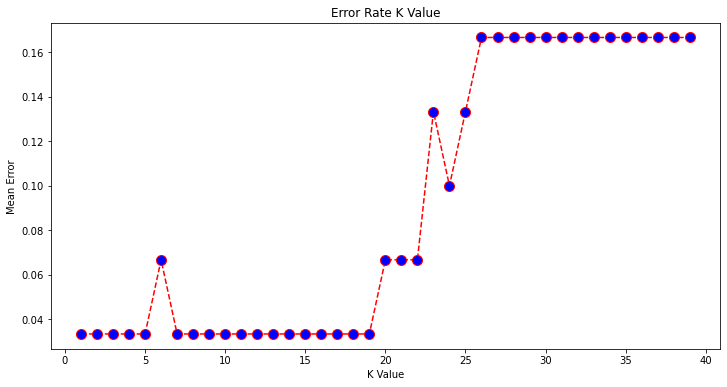

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [35]:
dic = {'Classe': y_test, 'Resultado': pred_i}
df_resultado = pd.DataFrame(dic)
df_resultado

,Classe,Resultado
0,Vingadores,Vingadores
1,guardiões-da-galáxia,guardiões-da-galáxia
2,guardiões-da-galáxia,guardiões-da-galáxia
3,guardiões-da-galáxia,guardiões-da-galáxia
4,Vingadores,Vingadores
5,Vingadores,Vingadores
6,X-Men,X-Men
7,guardiões-da-galáxia,guardiões-da-galáxia
8,X-Men,guardiões-da-galáxia
9,Vingadores,Vingadores


In [36]:
acertos = (y_test == pred_i).sum()
erros = 30 - acertos
print('Acertou: {}\nErrou: {}'.format(acertos, erros))

Acertou: 28
Errou: 2


# RESULTADOS

In [37]:
from sklearn.metrics import confusion_matrix, classification_report

# MATRIZ DE CONUFSÃO

In [38]:
print(confusion_matrix(y_test, pred_i))

[[11  0  0]
 [ 0  9  2]
 [ 0  0  8]]


In [39]:
print(classification_report(y_test, pred_i))

                      precision    recall  f1-score   support

          Vingadores       1.00      1.00      1.00        11
               X-Men       1.00      0.82      0.90        11
guardiões-da-galáxia       0.80      1.00      0.89         8

            accuracy                           0.93        30
           macro avg       0.93      0.94      0.93        30
        weighted avg       0.95      0.93      0.93        30

